  **DS Internship – Modeling**

 **Machine** **Learning**


**QUESTION 1**

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


data = pd.read_csv("/content/DS Internship - Modeling - Data.csv")

# Data Preprocessing
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop('Sales', axis=1)
y = data['Sales']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)
print("Predicted Sales:")
print(y_pred)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'\nMean Absolute Percentage Error (MAPE): {mape}')

# Identify Key Drivers
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the model:")
coefficients.sort_values(by='Coefficient', ascending=False)


Predicted Sales:
[ 1.25185157e+06  2.42763004e+06  1.98757144e+06  2.21694705e+06
 -4.58384292e+17  5.96092880e+17 -1.57577977e+18  2.13051763e+06
  2.29039744e+06  1.41256936e+06  8.98368943e+17  1.84303754e+06
  1.49866440e+06  1.20990291e+06  4.33326163e+18  1.05050748e+06
  1.30347656e+06  2.72396400e+06  1.21639511e+06  1.74471115e+06
  1.63447660e+06  7.63671762e+16  1.09313201e+06 -9.69710928e+17
  6.95995822e+18 -2.30858873e+18  2.35647244e+06 -2.19981188e+18
  2.52291338e+06  7.63671762e+16  8.60825505e+05  2.35443739e+06
 -2.74163143e+18  1.98170769e+06  2.17584753e+06  4.25324931e+17
  1.50186309e+06 -1.64842871e+19  1.95728396e+06  6.84133990e+17
  7.65306981e+05  2.09911574e+06  6.84721609e+05 -6.50527997e+16
  1.82991988e+06  4.33326163e+18  1.85838260e+06  2.13730305e+18
  5.21148556e+18  2.41208951e+06  1.07511617e+06  1.81856940e+06
  2.78721438e+06 -4.74469780e+18  1.66320021e+06  2.68294703e+18]

Mean Squared Error: 7.898412934534195e+36
R-squared: -3.189178411809017

,Coefficient
ChangeDate_2016-05-25 00:00:00,6.959958e+18
ChangeDate_2016-09-29 00:00:00,5.211486e+18
ChangeDate_2015-10-16 00:00:00,4.333262e+18
ChangeDate_2015-09-29 00:00:00,2.682947e+18
ChangeDate_2009-02-12 00:00:00,2.137303e+18
...,...
ChangeDate_2011-02-25 00:00:00,-2.199812e+18
ChangeDate_2015-04-16 00:00:00,-2.308589e+18
ChangeDate_2007-07-19 00:00:00,-2.741631e+18
ChangeDate_2010-10-14 00:00:00,-4.744698e+18


**QUESTION 2**

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'\nMean Absolute Percentage Error (MAPE): {mape}')


Mean Squared Error: 7.898412934534195e+36
R-squared: -3.1891784118090173e+25

Mean Absolute Percentage Error (MAPE): 672647771500.7917


**QUESTION 3**

In [55]:
from openpyxl import Workbook
# Create an Excel workbook and add the metrics
wb = Workbook()
ws = wb.active
ws.title = "Model Summary"

# Add model performance metrics to the worksheet
ws.append(["Model Performance Metrics"])
ws.append(["Metric", "Value"])
ws.append(["Mean Squared Error (MSE)", mse])
ws.append(["R-squared (R2)", r2])
ws.append(["Mean Absolute Percentage Error (MAPE)", mape])
# Add an empty row for separation
ws.append([])

# Add model coefficients to the worksheet
ws.append(["Model Coefficients"])
ws.append(["Feature", "Coefficient"])
for feature, coef in zip(X.columns, model.coef_):
    ws.append([feature, coef])

output_file = '/content/Model_Summary_Client_ABC.xlsx'
wb.save(output_file)
print(f'Report saved to {output_file}')

Report saved to /content/Model_Summary_Client_ABC.xlsx


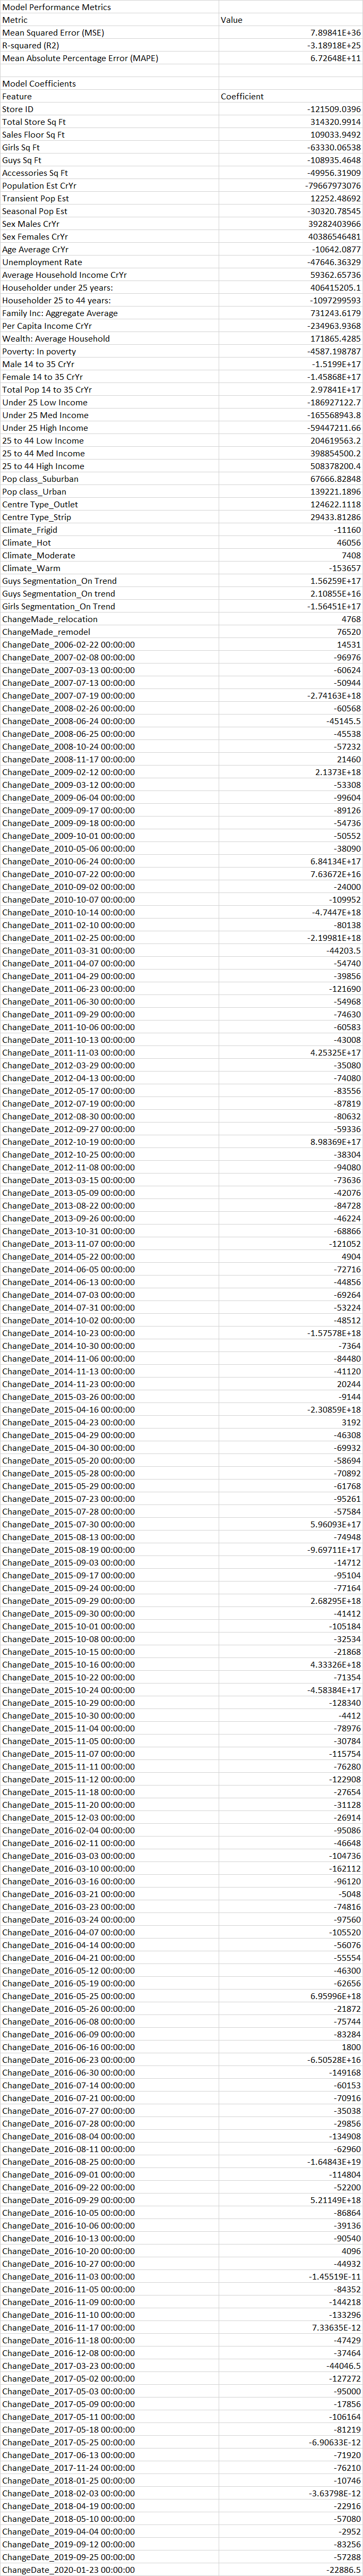

 **Guidelines** **for ML** **Model**

**QUESTION 1**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape, X_test.shape

((223, 194), (56, 194))

In [58]:
y_train.shape, y_test.shape

((223,), (56,))

**QUESTION 2**

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("/content/DS Internship - Modeling - Data.csv")

# Handle missing values using median imputation
imputer = SimpleImputer(strategy='median')
data[['Girls Sq Ft', 'Guys Sq Ft', 'Accessories Sq Ft']] = imputer.fit_transform(data[['Girls Sq Ft', 'Guys Sq Ft', 'Accessories Sq Ft']])

# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the data into features and target variable
X = data_encoded.drop('Sales', axis=1)
y = data_encoded['Sales']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(float)


# Adding a constant to the model for the intercept term (required for OLS in statsmodels)
X_train_sm = sm.add_constant(X_train)

# Fitting the OLS linear regression model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Model summary
model_summary = ols_model.summary()
print(model_summary)



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     3.998
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           1.63e-29
Time:                        10:52:40   Log-Likelihood:                -7706.2
No. Observations:                 552   AIC:                         1.576e+04
Df Residuals:                     378   BIC:                         1.651e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**QUESTION 3**

In [60]:
import statsmodels.api as sm
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    while True:
        ols_model = sm.OLS(y, X).fit()
        p_values = ols_model.pvalues
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            X = X.drop(columns=excluded_feature)
        else:
            break
    return X, ols_model
X_train_selected, ols_model_selected = backward_elimination(X_train, y_train)
print(ols_model_selected.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     33.90
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           2.37e-76
Time:                        10:52:46   Log-Likelihood:                -7782.7
No. Observations:                 552   AIC:                         1.560e+04
Df Residuals:                     533   BIC:                         1.569e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**QUESTION 4**

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(len(X_train_selected.columns))]
print(vif_data)


                           feature        VIF
0                            const  82.967851
1                Total Store Sq Ft   1.202078
2              Population Est CrYr  66.340066
3    Average Household Income CrYr   6.573860
4           Per Capita Income CrYr   5.582752
5              Poverty: In poverty  29.894609
6              25 to 44 Med Income  40.258898
7               Pop class_Suburban   1.311396
8               Centre Type_Outlet   1.697304
9                Centre Type_Strip   1.356076
10      Guys Segmentation_On Trend   1.185242
11      Guys Segmentation_On trend   1.047947
12              ChangeMade_remodel   1.087492
13  ChangeDate_2015-04-23 00:00:00   1.007454
14  ChangeDate_2015-10-08 00:00:00   1.014505
15  ChangeDate_2015-10-30 00:00:00   1.008141
16  ChangeDate_2016-06-16 00:00:00   1.008392
17  ChangeDate_2018-01-25 00:00:00   1.017104
18  ChangeDate_2019-04-04 00:00:00   1.009380


**QUESTION 5**

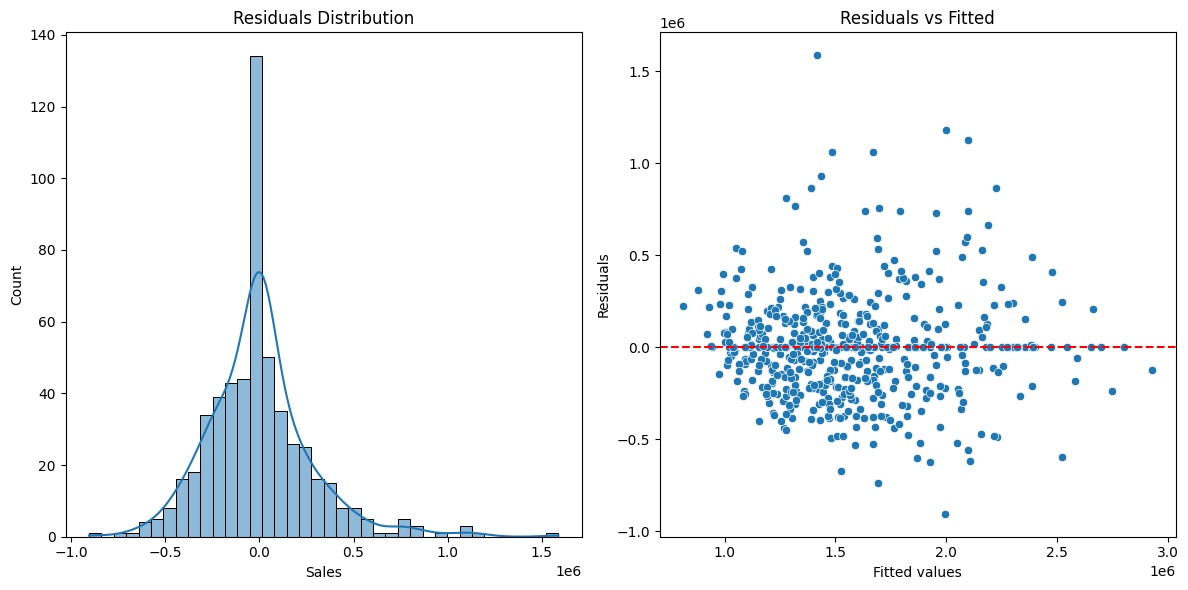

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
model.fit(X_train_sm, y_train)

y_train_pred = model.predict(X_train_sm)

# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()